<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [2]:
from bs4 import BeautifulSoup
import requests
jobs = pd.read_csv('./data/job_listings.csv', index_col=0)
jobs.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
jobs['title'].unique()

array(['Data scientist\xa0', 'Data Scientist I',
       'Data Scientist - Entry Level', 'Data Scientist',
       'Associate Data Scientist – Premium Analytics',
       'Sr. Data Scientist', 'Data Scientist, Lifecyle',
       'Data Scientist, Neuroimaging', 'Data Scientist II',
       'Data Scientist - Risk', 'Data Analyst/Jr. Data Scientist',
       'Assistant Data Scientist', 'Data Scientist, Junior',
       'Data Scientist – Personalization', 'Data Scientist - [Remote]',
       'Measurement Data Scientist', 'WTE Data Science Engineer',
       'Data Scientist, Sales', 'Data Scientist Intern',
       'Jr. Data Scientist', 'Sr. Data Engineer',
       'Data Scientist/Data Analytics Intern - Summer 2019',
       'Data Science Internship – Summer 2019',
       'Data Scientist Summer Intern', 'Data Scientist (Senior)',
       'Data Scientist Internship - Summer 2019',
       'Data Scientist - Insurance', 'Junior Data Scientist',
       'Data Scientist - Computer Vision',
       'Data Scient

In [5]:
jobs.iloc[0]['description']

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [21]:
test_desc = jobs.iloc[0]['description']
eval(test_desc).decode()

"<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai¨ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\n</li><li><p>Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><div>\nApply Now</div

In [3]:
def soupify(x):
    x = eval(x).decode()
    x = BeautifulSoup(x, 'html.parser').get_text()
    x = re.sub(r"\r?\n", ' ', x)
    return x
    
descs = [soupify(x['description']) for _, x in jobs.iterrows()]
print(descs[0])

Job Requirements: Conceptual understanding in Machine Learning models like Nai¨ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now


## 2) Use Spacy to tokenize the listings 

In [21]:
nlp = spacy.load('en_core_web_lg')
def tokenize(text):
    text = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    doc = nlp(text)
    tokens = [t.lemma_.lower() for t in doc if not t.is_stop and not t.is_punct]
    return tokens

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [22]:
cvect = CountVectorizer(tokenizer=tokenize)
cvect.fit(descs)
dtm = cvect.transform(descs)
len(cvect.get_feature_names())

7923

In [23]:
dtm = pd.DataFrame(dtm.todense(), columns=cvect.get_feature_names())
dtm.head()

,,,,,-pron-,0,00,02,02115,03,...,zf,zfs,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich,zurichs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# ಠ_ಠ
dtm.columns[0]

' '

In [25]:
dtm.shape

(426, 7923)

## 4) Visualize the most common word counts

In [42]:
totes = dtm.sum().sort_values(ascending=False)
normed = (totes - totes.min()) / (totes.max() - totes.min())
top20 = normed[:20]
top20

datum          1.000000
               0.979942
experience     0.558721
work           0.475581
team           0.396802
business       0.358140
science        0.279942
product        0.256105
model          0.248256
data           0.242733
analytic       0.240116
analysis       0.233140
skill          0.206105
scientist      0.202907
machine        0.200872
build          0.184012
develop        0.178779
learning       0.177616
solution       0.165988
opportunity    0.165116
dtype: float64

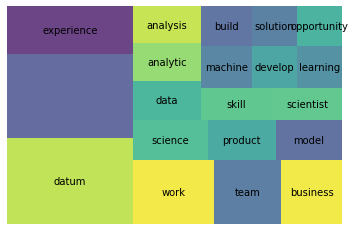

In [43]:
import squarify
squarify.plot(sizes=top20.values, label=top20.index, alpha=0.8)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [44]:
tfidf = TfidfVectorizer(tokenizer=tokenize)
dtm2 = tfidf.fit_transform(descs)
dtm2 = pd.DataFrame(dtm2.todense(), columns=tfidf.get_feature_names())
dtm2.head()

,,,,,-pron-,0,00,02,02115,03,...,zf,zfs,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich,zurichs
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.106089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.046972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.092748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.110027,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.082402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [45]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm2)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [50]:
nn.kneighbors([dtm2.iloc[0].values])

(array([[0.        , 1.28133075, 1.2912893 , 1.31052152, 1.31776653]]),
 array([[  0, 276, 274, 336, 115]]))

In [55]:
descs[0]

"Job Requirements: Conceptual understanding in Machine Learning models like Nai¨ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"

In [54]:
descs[276]

"Facebook's mission is to give people the power to build community and bring the world closer together. Through our family of apps and services, we're building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to them, and helps bring people closer together. Whether we're creating new products or helping a small business expand its reach, people at Facebook are builders at heart. Our global teams are constantly iterating, solving problems, and working together to empower people around the world to build community and connect in meaningful ways. Together, we can help people build stronger communities — we're just getting started. The Infrastructure Strategy group is responsible for the strategic analysis to support and enable the continued growth critical to Facebook’s infrastructure organization. The ideal candidate will be passionate about Facebook, have strong analytical and modeling aptitude and has experience u

In [51]:
ideal = tfidf.transform(['Foolhardy adventurer needed to fill seat'])
nn.kneighbors(ideal.todense())

(array([[1.31907628, 1.33488155, 1.35383406, 1.35383406, 1.36222715]]),
 array([[180, 235,  13,   6, 130]]))

In [56]:
descs[180]

'Contract6 month contract to hire position. Green Card/US Citizenship is required for this position.  We are looking for individuals to fill the role of Data Scientist on our model development team. This team builds the machine learning algorithms that identify and extract valuable information from client’s legal contracts.  The primary responsibilities include:  Using machine learning and other AI techniques to design, implement, and improve upon strategies to identify and extract important information from documents Working closely with business subject matter experts to gain an intimate understanding of both the structure and content of various document types Using data science effectively to answer business questions in an applied way  Required Qualifications   BS, MS, or PhD in Computer Science, Mathematics, Engineering, or related. Excellent Python development skills Experience in the application of Machine Learning to real-world business problems Experience in Computational Ling

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 